In [191]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import os
from sklearn.linear_model import LogisticRegression
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()
# For Notebooks
init_notebook_mode(connected=True)
# For offline use


4.5.2


In [78]:
# Load the imdb movie set dataset

df = pd.read_csv('C:/Users/shank/Desktop/Knowledge/DataSets/LinearRegression/movie_metadata.csv')

In [79]:
df.head(3)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000


In [80]:
df = df.dropna(how='any',axis=0)

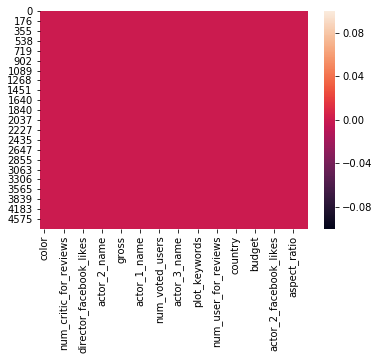

In [82]:
sns.heatmap(df.isnull())

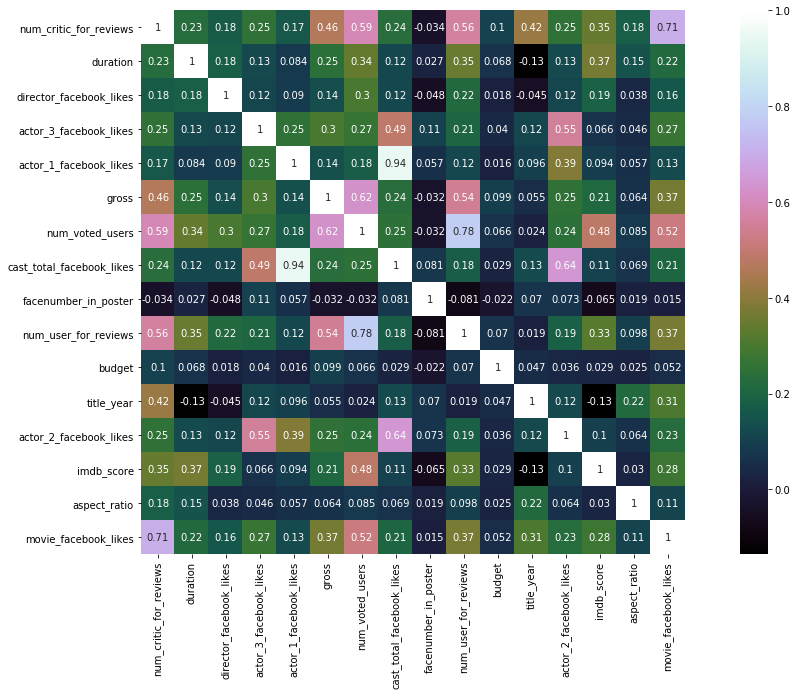

In [83]:
corr_mat=df.corr(method='pearson')
plt.figure(figsize=(20,10))
sns.heatmap(corr_mat,vmax=1,square=True,annot=True,cmap='cubehelix')

In [27]:
df['country'].value_counts().head(10)

USA          3807
UK            448
France        154
Canada        126
Germany        97
Australia      55
India          34
Spain          33
China          30
Italy          23
Name: country, dtype: int64

In [84]:
df['country'].value_counts().head(10)

USA          2987
UK            318
France        101
Germany        80
Canada         59
Australia      39
Spain          21
Japan          15
Hong Kong      13
China          13
Name: country, dtype: int64

In [29]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [32]:
df['director_name'].value_counts().head(20)

Steven Spielberg     26
Woody Allen          22
Martin Scorsese      20
Clint Eastwood       20
Ridley Scott         17
Steven Soderbergh    16
Tim Burton           16
Spike Lee            16
Renny Harlin         15
Oliver Stone         14
Barry Levinson       13
Ron Howard           13
Robert Zemeckis      13
John Carpenter       13
Sam Raimi            13
Joel Schumacher      13
Michael Bay          13
Robert Rodriguez     13
Shawn Levy           12
Wes Craven           12
Name: director_name, dtype: int64

In [90]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2817 entries, 2057 to 3059
Data columns (total 15 columns):
num_critic_for_reviews       2817 non-null float64
duration                     2817 non-null float64
director_facebook_likes      2817 non-null float64
actor_3_facebook_likes       2817 non-null float64
actor_1_facebook_likes       2817 non-null float64
gross                        2817 non-null float64
num_voted_users              2817 non-null int64
cast_total_facebook_likes    2817 non-null int64
facenumber_in_poster         2817 non-null float64
num_user_for_reviews         2817 non-null float64
budget                       2817 non-null float64
title_year                   2817 non-null float64
actor_2_facebook_likes       2817 non-null float64
aspect_ratio                 2817 non-null float64
movie_facebook_likes         2817 non-null int64
dtypes: float64(12), int64(3)
memory usage: 352.1 KB


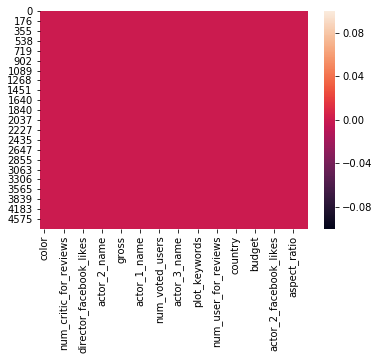

In [138]:
sns.heatmap(df.isnull())

In [75]:
df.dropna(how='any',axis=0)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
9,Color,David Yates,375.0,153.0,282.0,10000.0,Daniel Radcliffe,25000.0,301956980.0,Adventure|Family|Fantasy|Mystery,...,973.0,English,UK,PG,250000000.0,2009.0,11000.0,7.5,2.35,10000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000


In [87]:
y = df['imdb_score']


In [86]:
#df = pd.read_csv('sample.csv', index_col=0)
non_floats = []
for col in df:
    if df[col].dtypes != "float64" and df[col].dtypes != "int64" :
        non_floats.append(col)
X = df.drop(columns=non_floats)

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.drop('imdb_score',axis=1),y,test_size=0.30, random_state=42)


In [153]:
#logmodel = LogisticRegression()
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
pred = lm.predict(X_test)

In [155]:
print("Intercept:" , lm.intercept_)
print("Coefficients:", lm.coef_)

Intercept: 48.25353244152958
Coefficients: [ 2.66110294e-03  1.07062394e-02  8.37104773e-06  6.95354208e-05
  7.17956852e-05 -2.35363938e-09  3.66696062e-06 -7.11927066e-05
 -2.08716259e-02 -5.60202897e-04 -5.63157919e-11 -2.15859486e-02
  7.36926103e-05 -7.04135264e-02 -1.65851951e-06]


In [156]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1127 entries, 2327 to 3529
Data columns (total 15 columns):
num_critic_for_reviews       1127 non-null float64
duration                     1127 non-null float64
director_facebook_likes      1127 non-null float64
actor_3_facebook_likes       1127 non-null float64
actor_1_facebook_likes       1127 non-null float64
gross                        1127 non-null float64
num_voted_users              1127 non-null int64
cast_total_facebook_likes    1127 non-null int64
facenumber_in_poster         1127 non-null float64
num_user_for_reviews         1127 non-null float64
budget                       1127 non-null float64
title_year                   1127 non-null float64
actor_2_facebook_likes       1127 non-null float64
aspect_ratio                 1127 non-null float64
movie_facebook_likes         1127 non-null int64
dtypes: float64(12), int64(3)
memory usage: 140.9 KB


Text(0, 0.5, 'Predicted Y')

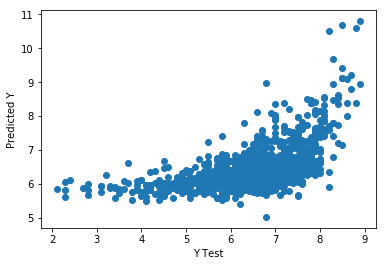

In [157]:
plt.scatter(y_test,pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

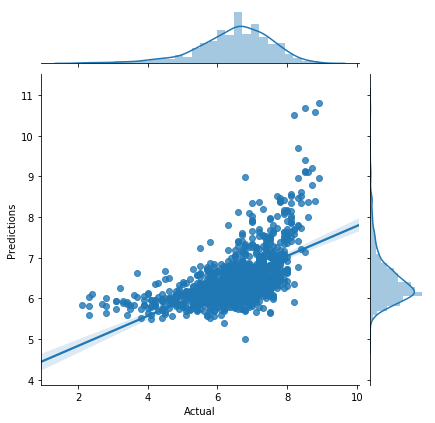

In [189]:
plot= sns.jointplot(x=y_test,y=pred,kind='reg').set_axis_labels("Actual", "Predictions")
plot

In [169]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.656963642710631
MSE: 0.746844020831724
RMSE: 0.8642013774761783


In [174]:
y_test.head(10)

2327    7.0
1108    6.5
3977    6.8
457     7.7
4418    5.8
1997    6.6
96      8.6
1524    7.6
4563    5.6
1994    5.6
Name: imdb_score, dtype: float64

In [176]:
pred[1:10]

array([7.0340982 , 5.96841494, 6.65655961, 5.92644919, 6.72441141,
       9.10381868, 6.79967262, 5.9687354 , 6.37572241])

In [101]:
X.columns

Index(['num_critic_for_reviews', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross',
       'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
       'num_user_for_reviews', 'budget', 'title_year',
       'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio',
       'movie_facebook_likes'],
      dtype='object')

In [159]:
coeffecients = pd.DataFrame(lm.coef_,X_train.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
num_critic_for_reviews,2.661103e-03
duration,1.070624e-02
director_facebook_likes,8.371048e-06
actor_3_facebook_likes,6.953542e-05
actor_1_facebook_likes,7.179569e-05
gross,-2.353639e-09
num_voted_users,3.666961e-06
cast_total_facebook_likes,-7.119271e-05
facenumber_in_poster,-2.087163e-02
num_user_for_reviews,-5.602029e-04


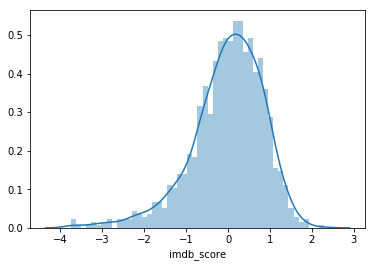

In [160]:
sns.distplot((y_test-pred),bins=50);

In [161]:
print(lm.intercept_)
print(lm.coef_)

48.25353244152958
[ 2.66110294e-03  1.07062394e-02  8.37104773e-06  6.95354208e-05
  7.17956852e-05 -2.35363938e-09  3.66696062e-06 -7.11927066e-05
 -2.08716259e-02 -5.60202897e-04 -5.63157919e-11 -2.15859486e-02
  7.36926103e-05 -7.04135264e-02 -1.65851951e-06]


In [162]:
### STATSMODELS ###

# print a summary of the fitted model
lm.score(X_test,y_test)

0.35292657463682187

In [163]:
lin_score_train = lm.score(X_test, y_test)
lin_score_test = lm.score(X_train, y_train)
print(lin_score_train*100)
print(lin_score_test*100)

35.29265746368219
36.7919844728467


In [111]:
lin_score_train

0.3256497756021284

In [164]:
from sklearn.metrics import r2_score
print(r2_score(y_test, pred))

0.35292657463682187


In [167]:
from sklearn import neighbors
n_neighbors=50
knn=neighbors.KNeighborsRegressor(n_neighbors,weights='uniform')
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=50, p=2,
          weights='uniform')

In [168]:
knn_score_train = knn.score(X_test, y_test)
knn_score_test = knn.score(X_train, y_train)

print("Training score: ",knn_score_train)
print("Testing score: ",knn_score_test)


Training score:  0.09050015455600913
Testing score:  0.12412687585830418
